<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/main/Parcial3/Casino_tramposo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Secuencias más probables:
           Secuencia Oculta  Probabilidad  Probabilidad (%)
0  [B, B, B, B, J, J, J, J]      0.000191          9.878991
1  [J, J, J, J, J, J, J, J]      0.000164          8.469643
2  [B, B, B, J, J, J, J, J]      0.000106          5.488328
3  [B, B, B, B, B, B, B, B]      0.000099          5.121269
4  [B, B, B, B, J, J, J, B]      0.000086          4.445546


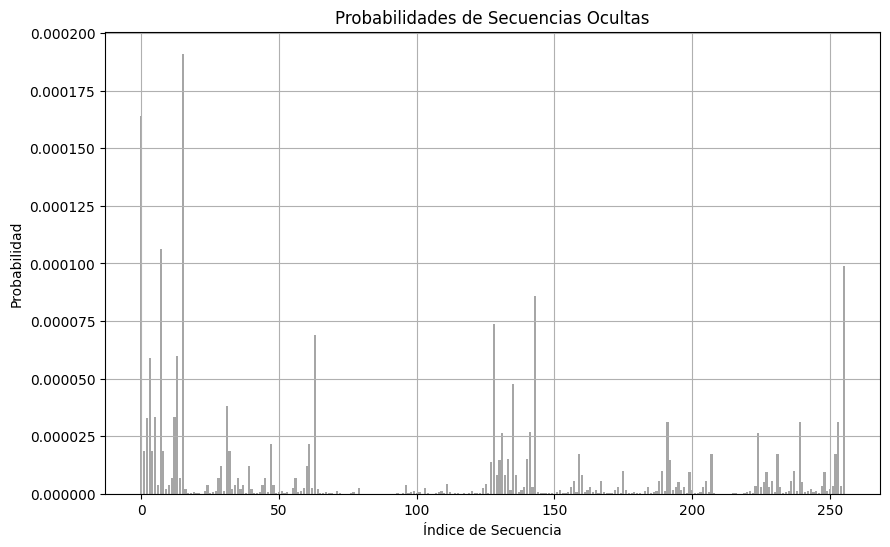


La suma total de probabilidades para estados ocultos es: 0.0019

La suma de probabilidades sobre estados observables es: 1.0000

Dado el estado observable ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C'], la probabilidad total es: 1.00.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce


estado_obs = {0: 'C', 1: 'S'}
estado_oculto = {0: 'J', 1: 'B'}


prior = np.array([0.2, 0.8])
T = np.array([[0.8, 0.2], [0.2, 0.8]])
E = np.array([[0.5, 0.9], [0.5, 0.1]])
observaciones = [1, 0, 0, 0, 1, 0, 1, 0]


def generar_combinaciones(n, estados):
    return np.array(np.meshgrid(*[estados] * n)).T.reshape(-1, n)


def calcular_probabilidad_oculta(secuencia, observaciones, prior, T, E):

    prob_inicial = prior[secuencia[0]]
    prob_transiciones = reduce(lambda acc, i: acc * T[secuencia[i], secuencia[i - 1]], range(1, len(secuencia)), 1)
    prob_emisiones = np.prod([E[obs, sec] for obs, sec in zip(observaciones, secuencia)])
    return prob_inicial * prob_transiciones * prob_emisiones


estados_ocultos = generar_combinaciones(len(observaciones), [0, 1])
probabilidades_ocultas = np.array([calcular_probabilidad_oculta(seq, observaciones, prior, T, E) for seq in estados_ocultos])


df_ocultos = pd.DataFrame({
    "Secuencia Oculta": [[estado_oculto[s] for s in seq] for seq in estados_ocultos],
    "Probabilidad": probabilidades_ocultas
})
df_ocultos["Probabilidad (%)"] = df_ocultos["Probabilidad"] * 100 / probabilidades_ocultas.sum()
df_ocultos = df_ocultos.sort_values(by="Probabilidad", ascending=False).reset_index(drop=True)


print("\nSecuencias más probables:")
print(df_ocultos.head())


plt.figure(figsize=(10, 6))
plt.bar(range(len(probabilidades_ocultas)), probabilidades_ocultas, color="gray", alpha=0.7)
plt.title("Probabilidades de Secuencias Ocultas")
plt.xlabel("Índice de Secuencia")
plt.ylabel("Probabilidad")
plt.grid()
plt.show()


suma_total_ocultos = probabilidades_ocultas.sum()


estados_observables = generar_combinaciones(len(observaciones), [0, 1])
suma_observables = 0

for secuencia_observable in estados_observables:
    probabilidades_observables = np.array([
        calcular_probabilidad_oculta(estado, secuencia_observable, prior, T, E) for estado in estados_ocultos
    ])
    suma_observables += probabilidades_observables.sum()

# Resultados
print(f"\nLa suma total de probabilidades para estados ocultos es: {suma_total_ocultos:.4f}")
print(f"\nLa suma de probabilidades sobre estados observables es: {suma_observables:.4f}")
print(f"\nDado el estado observable {[estado_obs[obs] for obs in observaciones]}, la probabilidad total es: {suma_observables:.2f}.")


(G) Sí, el resultado depende de la probabilidad a-priori, ya que estas representan las creencias iniciales sobre la distribución de los estados ocultos antes de observar los datos. Estas probabilidades iniciales afectan el cálculo de las probabilidades conjuntas de las secuencias ocultas, dando más peso a aquellas que comienzan en estados con mayor probabilidad a-priori. Incluso si las matrices de transición y emisión están bien definidas, cambiar las probabilidades iniciales puede alterar los resultados finales. Si no se dispone de información confiable, una elección uniforme minimiza el sesgo en el análisis.

(H) Para estimar las matrices de transición y emisión a partir de datos, se utiliza el algoritmo Baum-Welch, que es una variante del método de Expectation-Maximization. Este algoritmo ajusta iterativamente las probabilidades iniciales, de transición y de emisión para maximizar la probabilidad de las observaciones dadas las secuencias ocultas. En un contexto práctico, se recolectan datos observados y se define un modelo de Markov oculto (HMM), entrenándolo con las secuencias observadas. Usando bibliotecas como hmmlearn, las matrices se estiman automáticamente a partir de los datos. Por ejemplo, con datos sintéticos, se pueden inicializar parámetros aleatorios, entrenar el modelo, y obtener las matrices ajustadas, lo que permite una interpretación clara y datos generalizables para futuras observaciones.